In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pywin.scintilla.formatter import Style
from scipy.stats import Logistic
from sympy import rotations
from win32console import FOREGROUND_RED



# Read Dataset

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')

In [3]:
df.head().style.background_gradient(cmap = "PuBu")

# Exploring and Cleaning the Data

In [4]:
from colorama import Fore, Style
print(Fore.RED + "DF Shape: " + Style.RESET_ALL)
print(f"{df.shape}")

DF Shape: 
(4269, 13)


In [5]:
print(Fore.LIGHTYELLOW_EX + "DF Info :"+ Style.RESET_ALL)
print(f"{df.info()}")

DF Info :
<class 'pandas.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   loan_id                    4269 non-null   int64
 1    no_of_dependents          4269 non-null   int64
 2    education                 4269 non-null   str  
 3    self_employed             4269 non-null   str  
 4    income_annum              4269 non-null   int64
 5    loan_amount               4269 non-null   int64
 6    loan_term                 4269 non-null   int64
 7    cibil_score               4269 non-null   int64
 8    residential_assets_value  4269 non-null   int64
 9    commercial_assets_value   4269 non-null   int64
 10   luxury_assets_value       4269 non-null   int64
 11   bank_asset_value          4269 non-null   int64
 12   loan_status               4269 non-null   str  
dtypes: int64(10), str(3)
memory usage: 433.7 KB
None


In [6]:
print(Fore.GREEN + "DF Columns: " + Style.RESET_ALL)
print(f"{df.columns.tolist()}")

DF Columns: 
['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [7]:
df = df.drop('loan_id', axis = 1)

In [8]:
# df.head()

In [9]:
# Removing extra white spaces in column names

df.columns = df.columns.str.strip()

In [10]:
print(df.columns.tolist())

['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [11]:
print(Fore.LIGHTRED_EX + "DF Statistical Summary: " + Style.RESET_ALL)
print(f"{df.describe()}")

DF Statistical Summary: 
       no_of_dependents  income_annum   loan_amount    loan_term  cibil_score  \
count       4269.000000  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean           2.498712  5.059124e+06  1.513345e+07    10.900445   599.936051   
std            1.695910  2.806840e+06  9.043363e+06     5.709187   172.430401   
min            0.000000  2.000000e+05  3.000000e+05     2.000000   300.000000   
25%            1.000000  2.700000e+06  7.700000e+06     6.000000   453.000000   
50%            3.000000  5.100000e+06  1.450000e+07    10.000000   600.000000   
75%            4.000000  7.500000e+06  2.150000e+07    16.000000   748.000000   
max            5.000000  9.900000e+06  3.950000e+07    20.000000   900.000000   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              4.269000e+03             4.269000e+03         4.269000e+03   
mean               7.472617e+06             4.973155e+06         1.512631e+07   
st

In [12]:
print(Fore.LIGHTBLUE_EX + "DF Null Values: " + Style.RESET_ALL)
print(f"{df.isnull().sum()}")

DF Null Values: 
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [13]:
# df.isna()

In [14]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   str  
 2   self_employed             4269 non-null   str  
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   str  
dtypes: int64(9), str(3)
memory usage: 400.3 KB


In [15]:
print(df['education'])

0            Graduate
1        Not Graduate
2            Graduate
3            Graduate
4        Not Graduate
            ...      
4264         Graduate
4265     Not Graduate
4266     Not Graduate
4267     Not Graduate
4268         Graduate
Name: education, Length: 4269, dtype: str


In [16]:
print(df['self_employed'])

0         No
1        Yes
2         No
3         No
4        Yes
        ... 
4264     Yes
4265     Yes
4266      No
4267      No
4268      No
Name: self_employed, Length: 4269, dtype: str


In [17]:
print(df['loan_status'])

0        Approved
1        Rejected
2        Rejected
3        Rejected
4        Rejected
          ...    
4264     Rejected
4265     Approved
4266     Rejected
4267     Approved
4268     Approved
Name: loan_status, Length: 4269, dtype: str


In [18]:
df['education'] = df['education'].str.strip()

In [19]:
df['self_employed'] = df['self_employed'].str.strip()


In [20]:
df['loan_status'] = df['loan_status'].str.strip()

In [21]:
print(df['loan_status'])

0       Approved
1       Rejected
2       Rejected
3       Rejected
4       Rejected
          ...   
4264    Rejected
4265    Approved
4266    Rejected
4267    Approved
4268    Approved
Name: loan_status, Length: 4269, dtype: str


In [22]:
numerical = df.select_dtypes(include=['int64']).columns
print(f"THere are {len(numerical)} numerical features in Dataset:\n {numerical}")

print(80 * "-")

categorical = df.select_dtypes(include=['str']).columns
print(f"There are {len(categorical)} categorical features in Dataset:\n {categorical}")

THere are 9 numerical features in Dataset:
 Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='str')
--------------------------------------------------------------------------------
There are 3 categorical features in Dataset:
 Index(['education', 'self_employed', 'loan_status'], dtype='str')


# EDA

In [23]:
## Target Variable Distribution

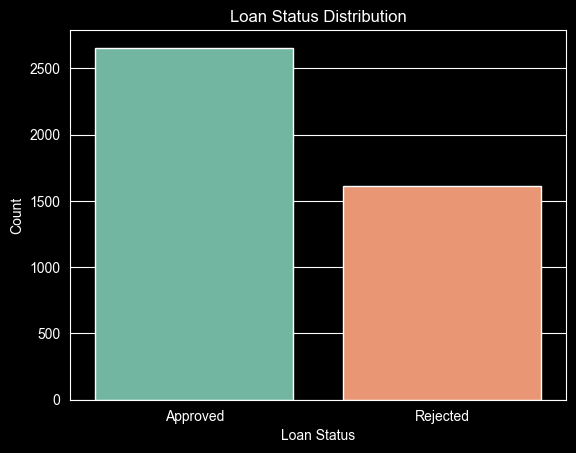

loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64


In [24]:
sb.countplot(x='loan_status', data = df, hue= 'loan_status', palette = 'Set2')
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

print(df['loan_status'].value_counts(normalize = True))

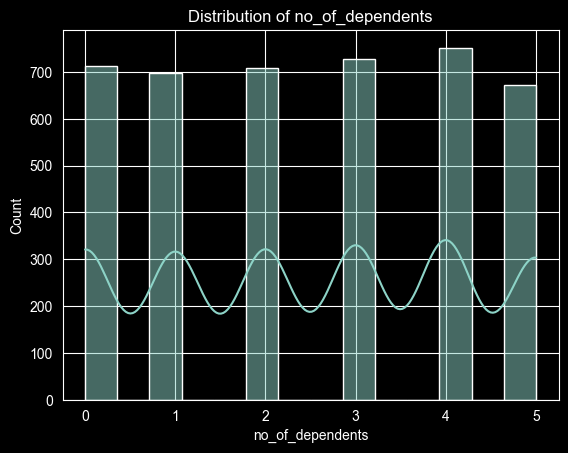

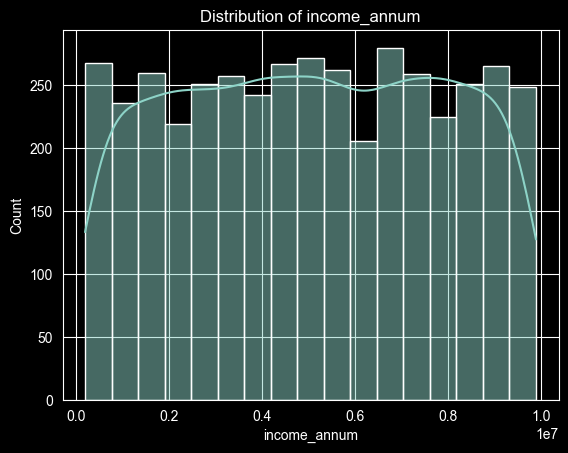

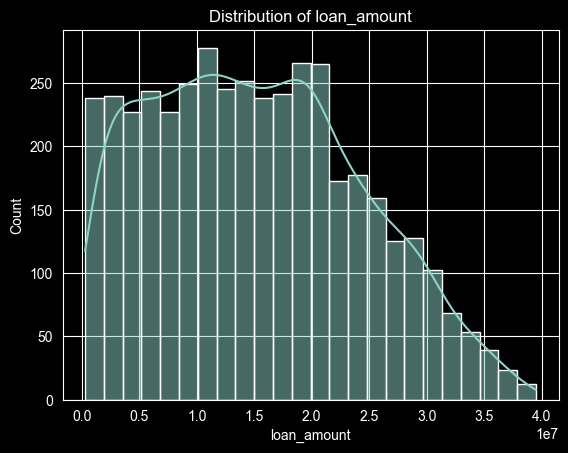

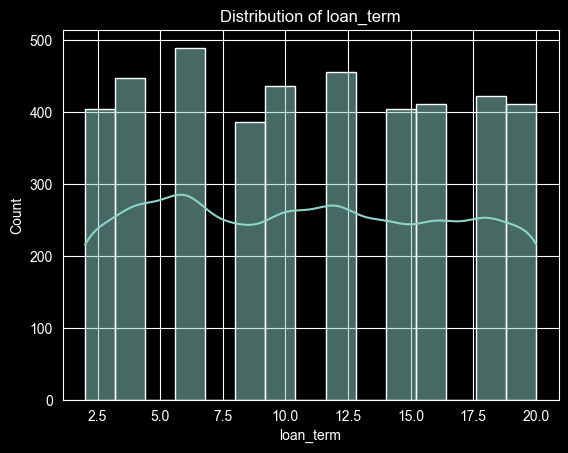

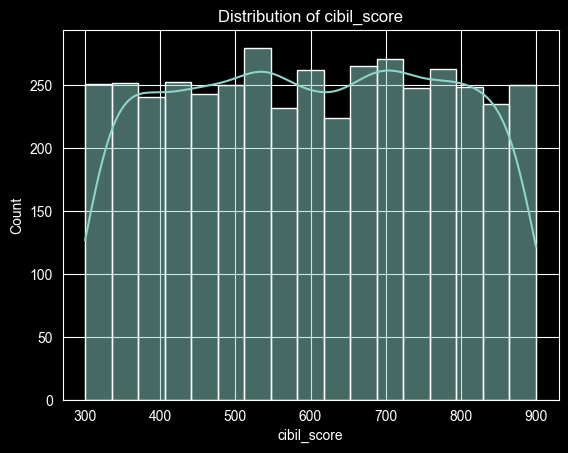

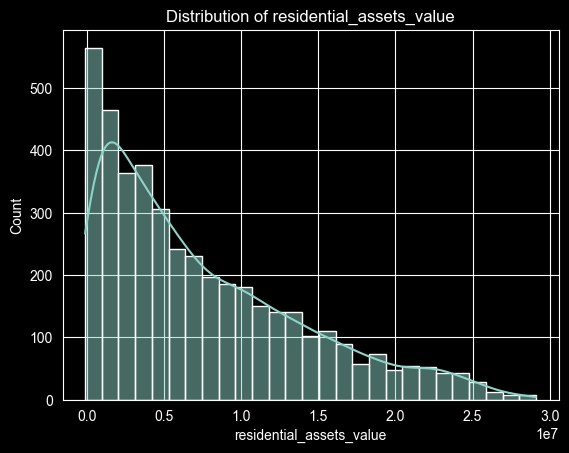

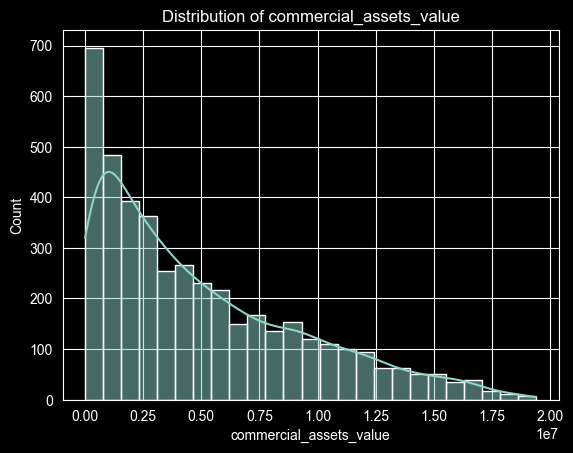

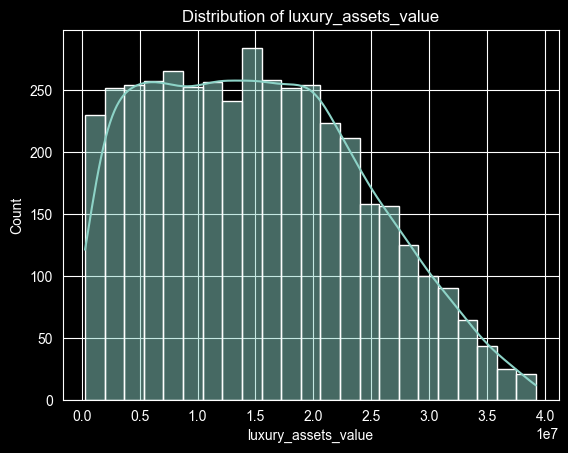

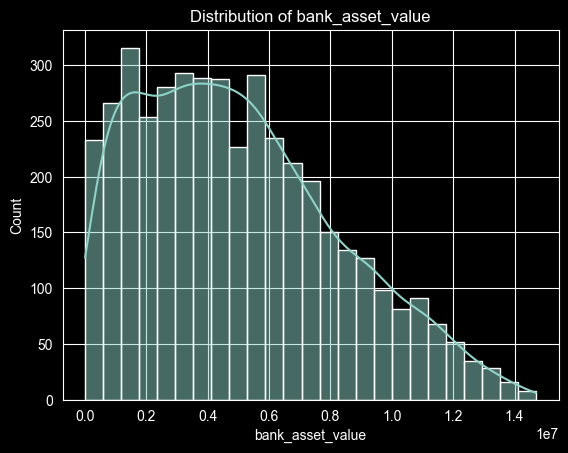

In [25]:
numerical_cols = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']

for col in numerical_cols:
    plt.figure()
    sb.histplot(df[col], kde = True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots (Outlier Detection)

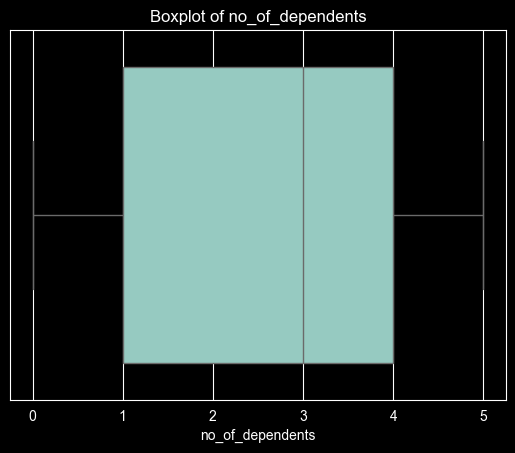

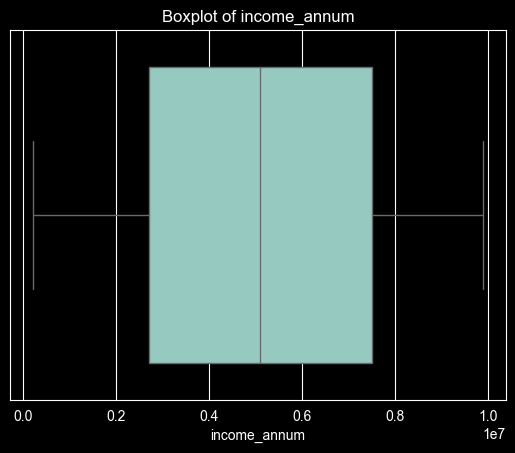

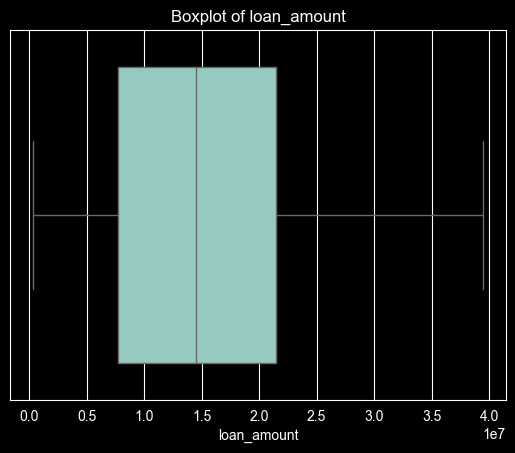

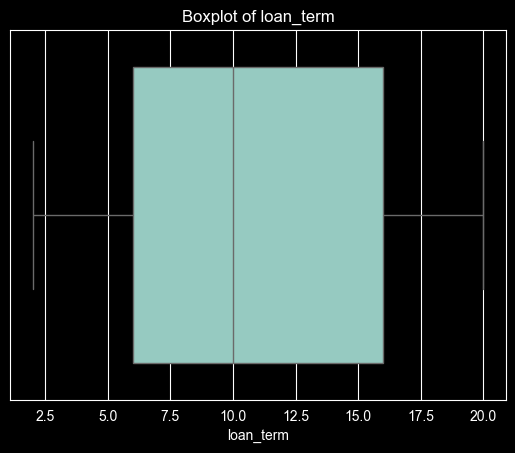

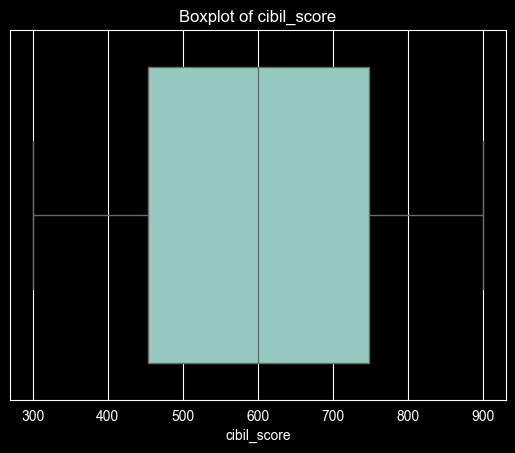

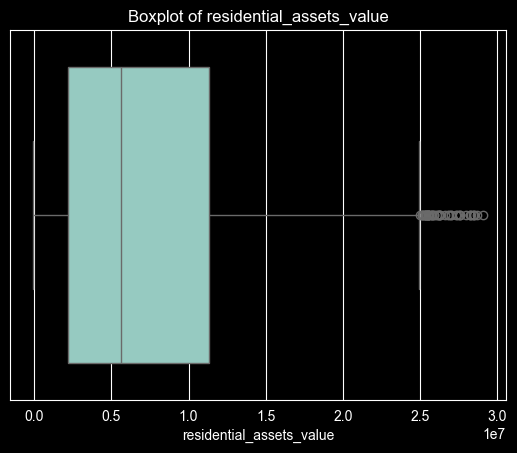

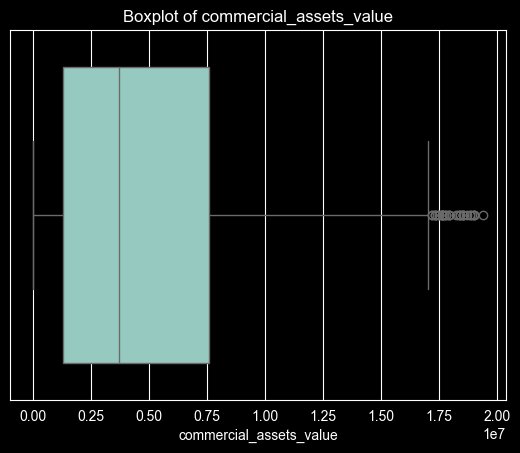

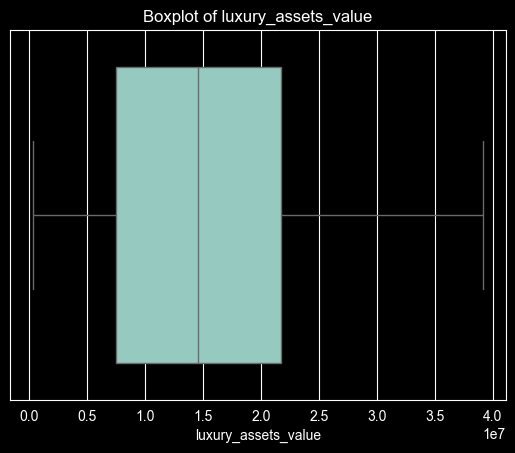

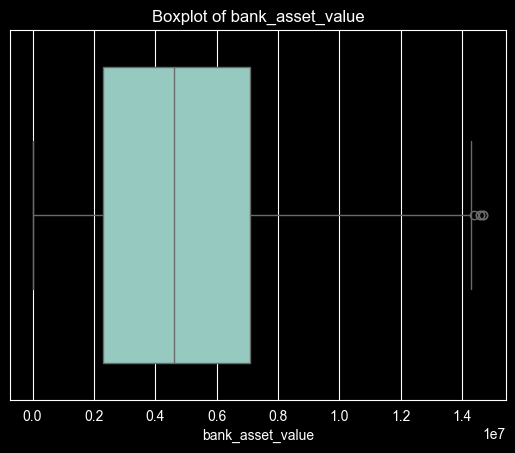

In [26]:
for col in numerical_cols:
    plt.figure()
    sb.boxplot(x= df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Numerical vs Target

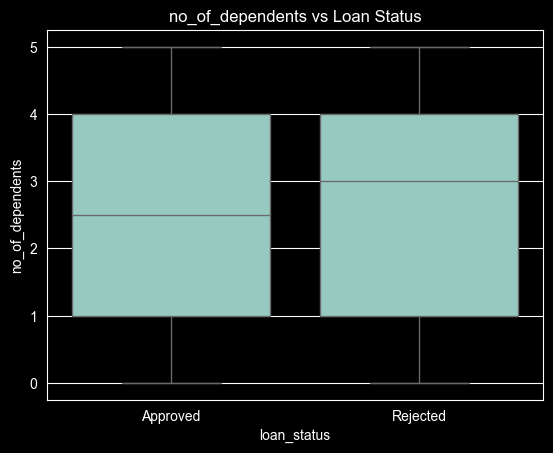

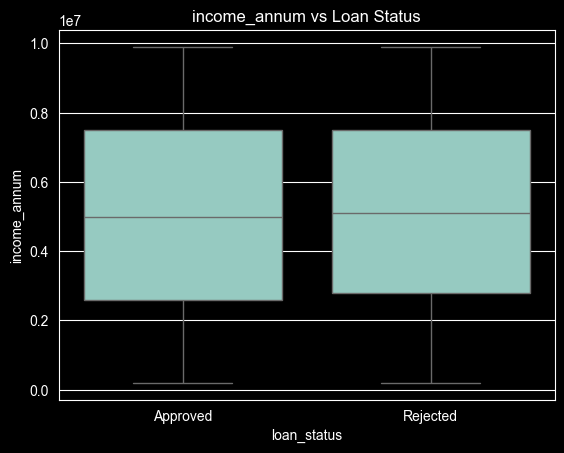

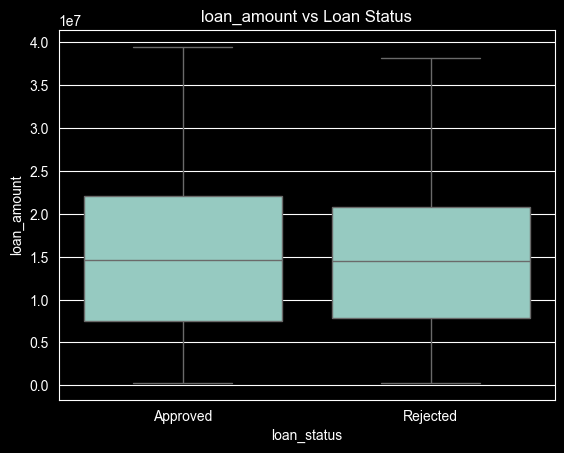

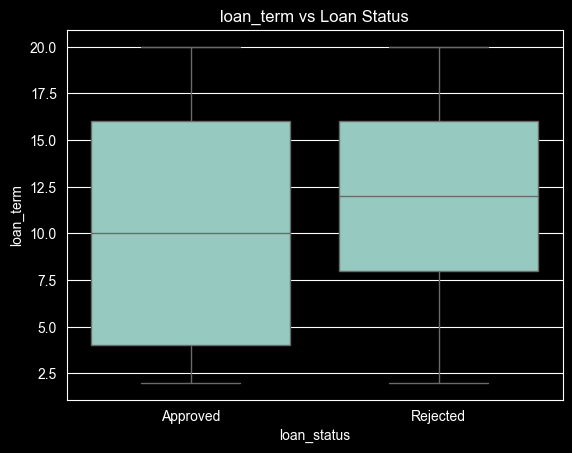

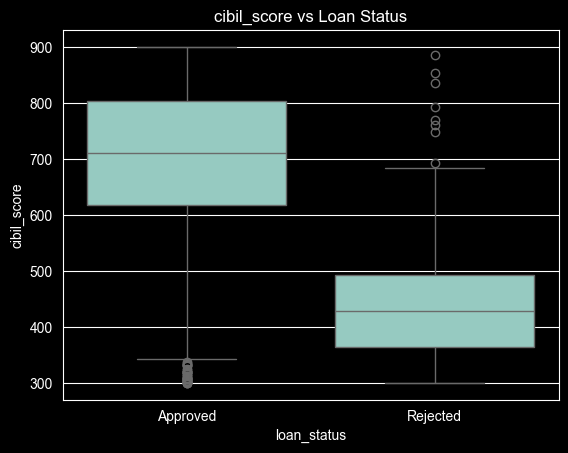

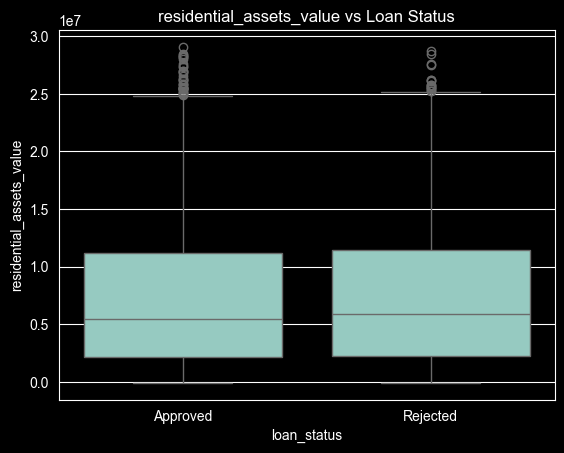

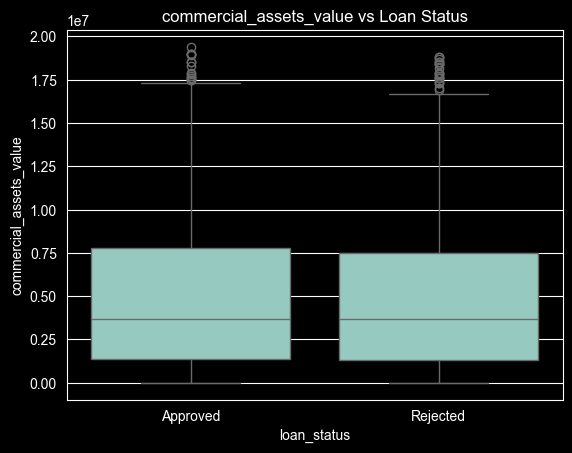

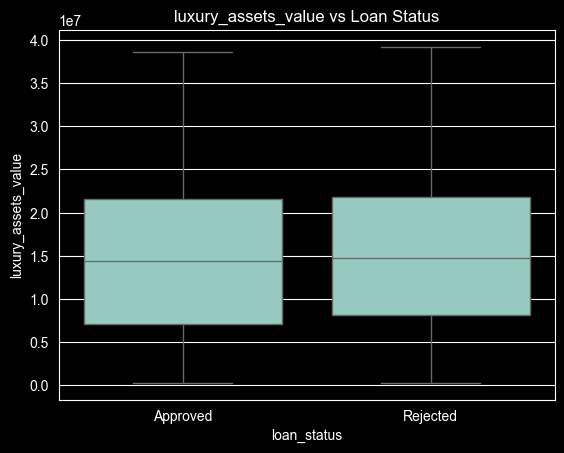

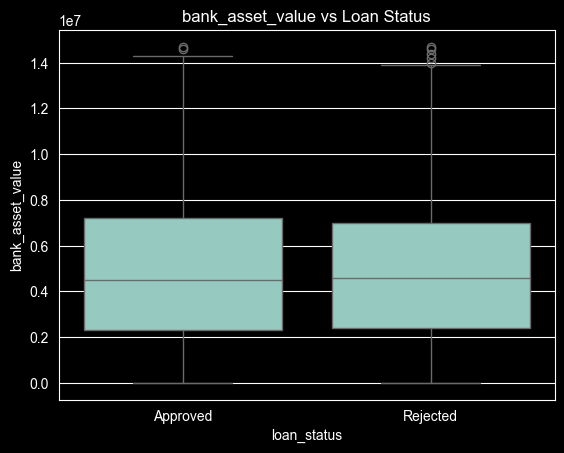

In [27]:
for col in numerical_cols:
    plt.figure()
    sb.boxplot(x = 'loan_status', y = col, data = df)
    plt.title(f"{col} vs Loan Status")
    plt.show()

# Categorical Features Analysis

In [28]:
categorical_cols = ['education', 'self_employed', 'loan_status']

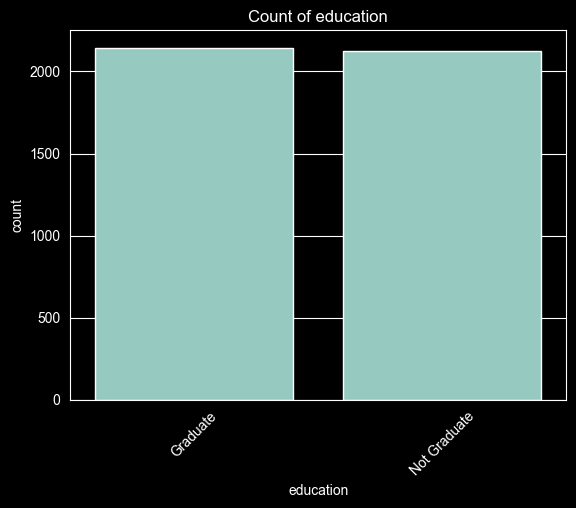

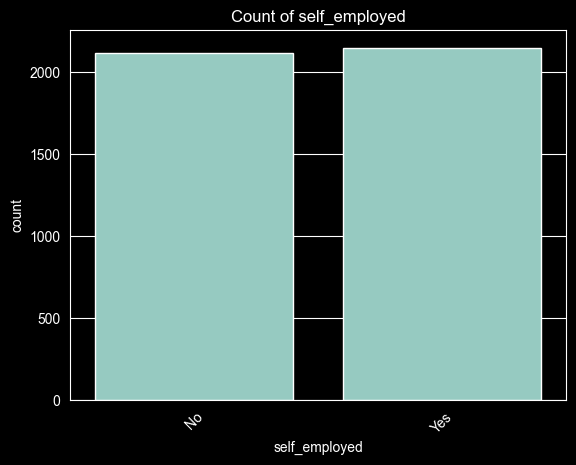

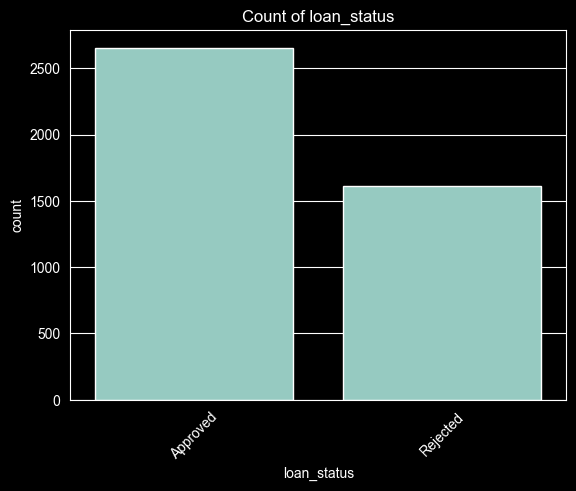

In [29]:
for col in categorical_cols:
    plt.figure()
    sb.countplot(x = col, data= df)
    plt.title(f"Count of {col}")
    plt.xticks(rotation= 45)
    plt.show()

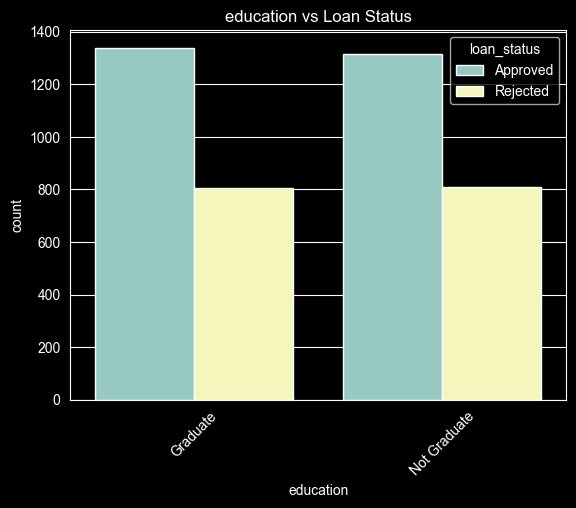

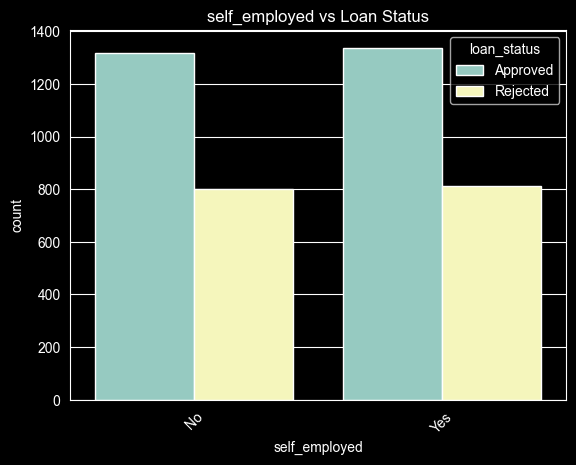

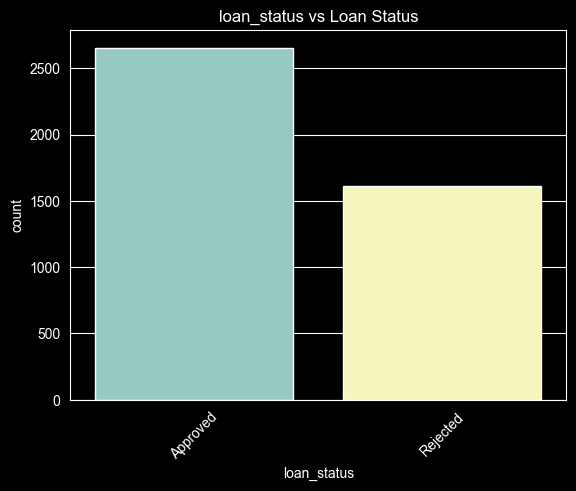

In [30]:
# Categorical vs Loan Status
for col in categorical_cols:
    plt.figure()
    sb.countplot(x = col, hue = 'loan_status', data = df)
    plt.title(f"{col} vs Loan Status")
    plt.xticks(rotation = 45)
    plt.show()

In [31]:
#Cibil Score Impact
# sb.countplot(x = '')
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='str')

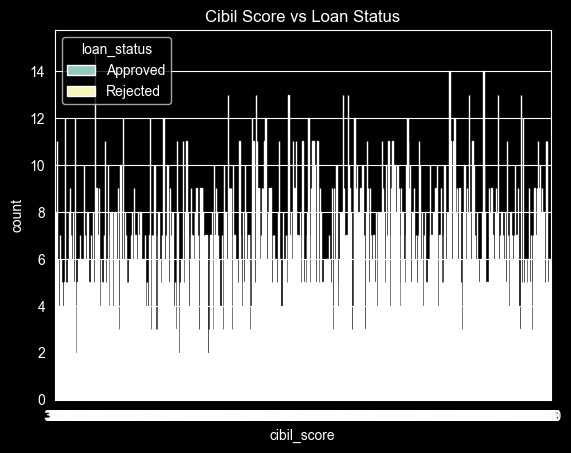

loan_status  Approved  Rejected
cibil_score                    
300          0.272727  0.727273
301          0.000000  1.000000
302          0.153846  0.846154
303          0.000000  1.000000
304          0.500000  0.500000
...               ...       ...
896          1.000000  0.000000
897          1.000000  0.000000
898          1.000000  0.000000
899          1.000000  0.000000
900          1.000000  0.000000

[601 rows x 2 columns]

In [32]:
sb.countplot(x = 'cibil_score', hue = 'loan_status', data = df, palette = 'Set3')
plt.title('Cibil Score vs Loan Status')
plt.show()

pd.crosstab(df['cibil_score'], df['loan_status'], normalize = 'index')

# Correlation Heatmap (Numeric Only)

In [33]:
# Convert loan_status to numeric
df['loan_status']  = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

In [34]:
# print(df['loan_status'])

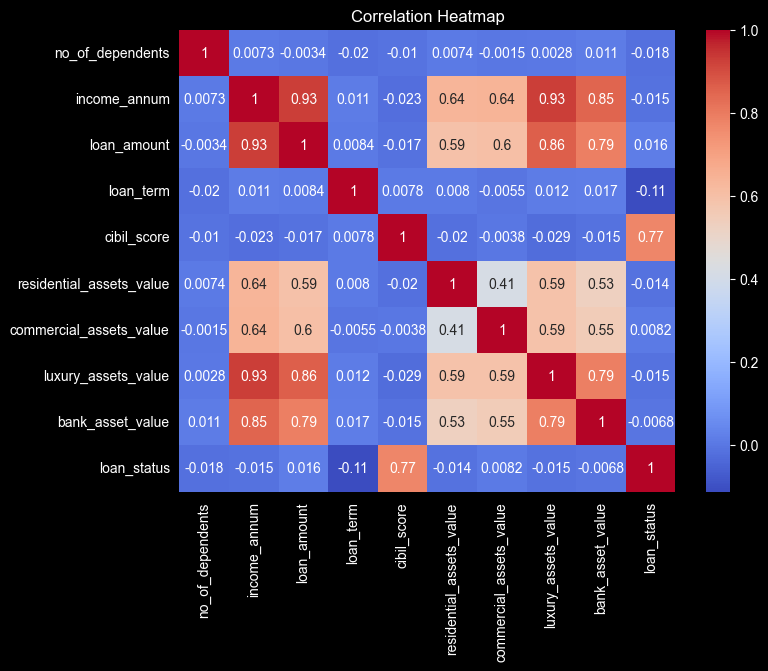

In [35]:
plt.figure(figsize= (8, 6))
sb.heatmap(df[numerical_cols + ['loan_status']].corr(),
           annot = True, cmap = 'coolwarm')

plt.title("Correlation Heatmap")
plt.show()

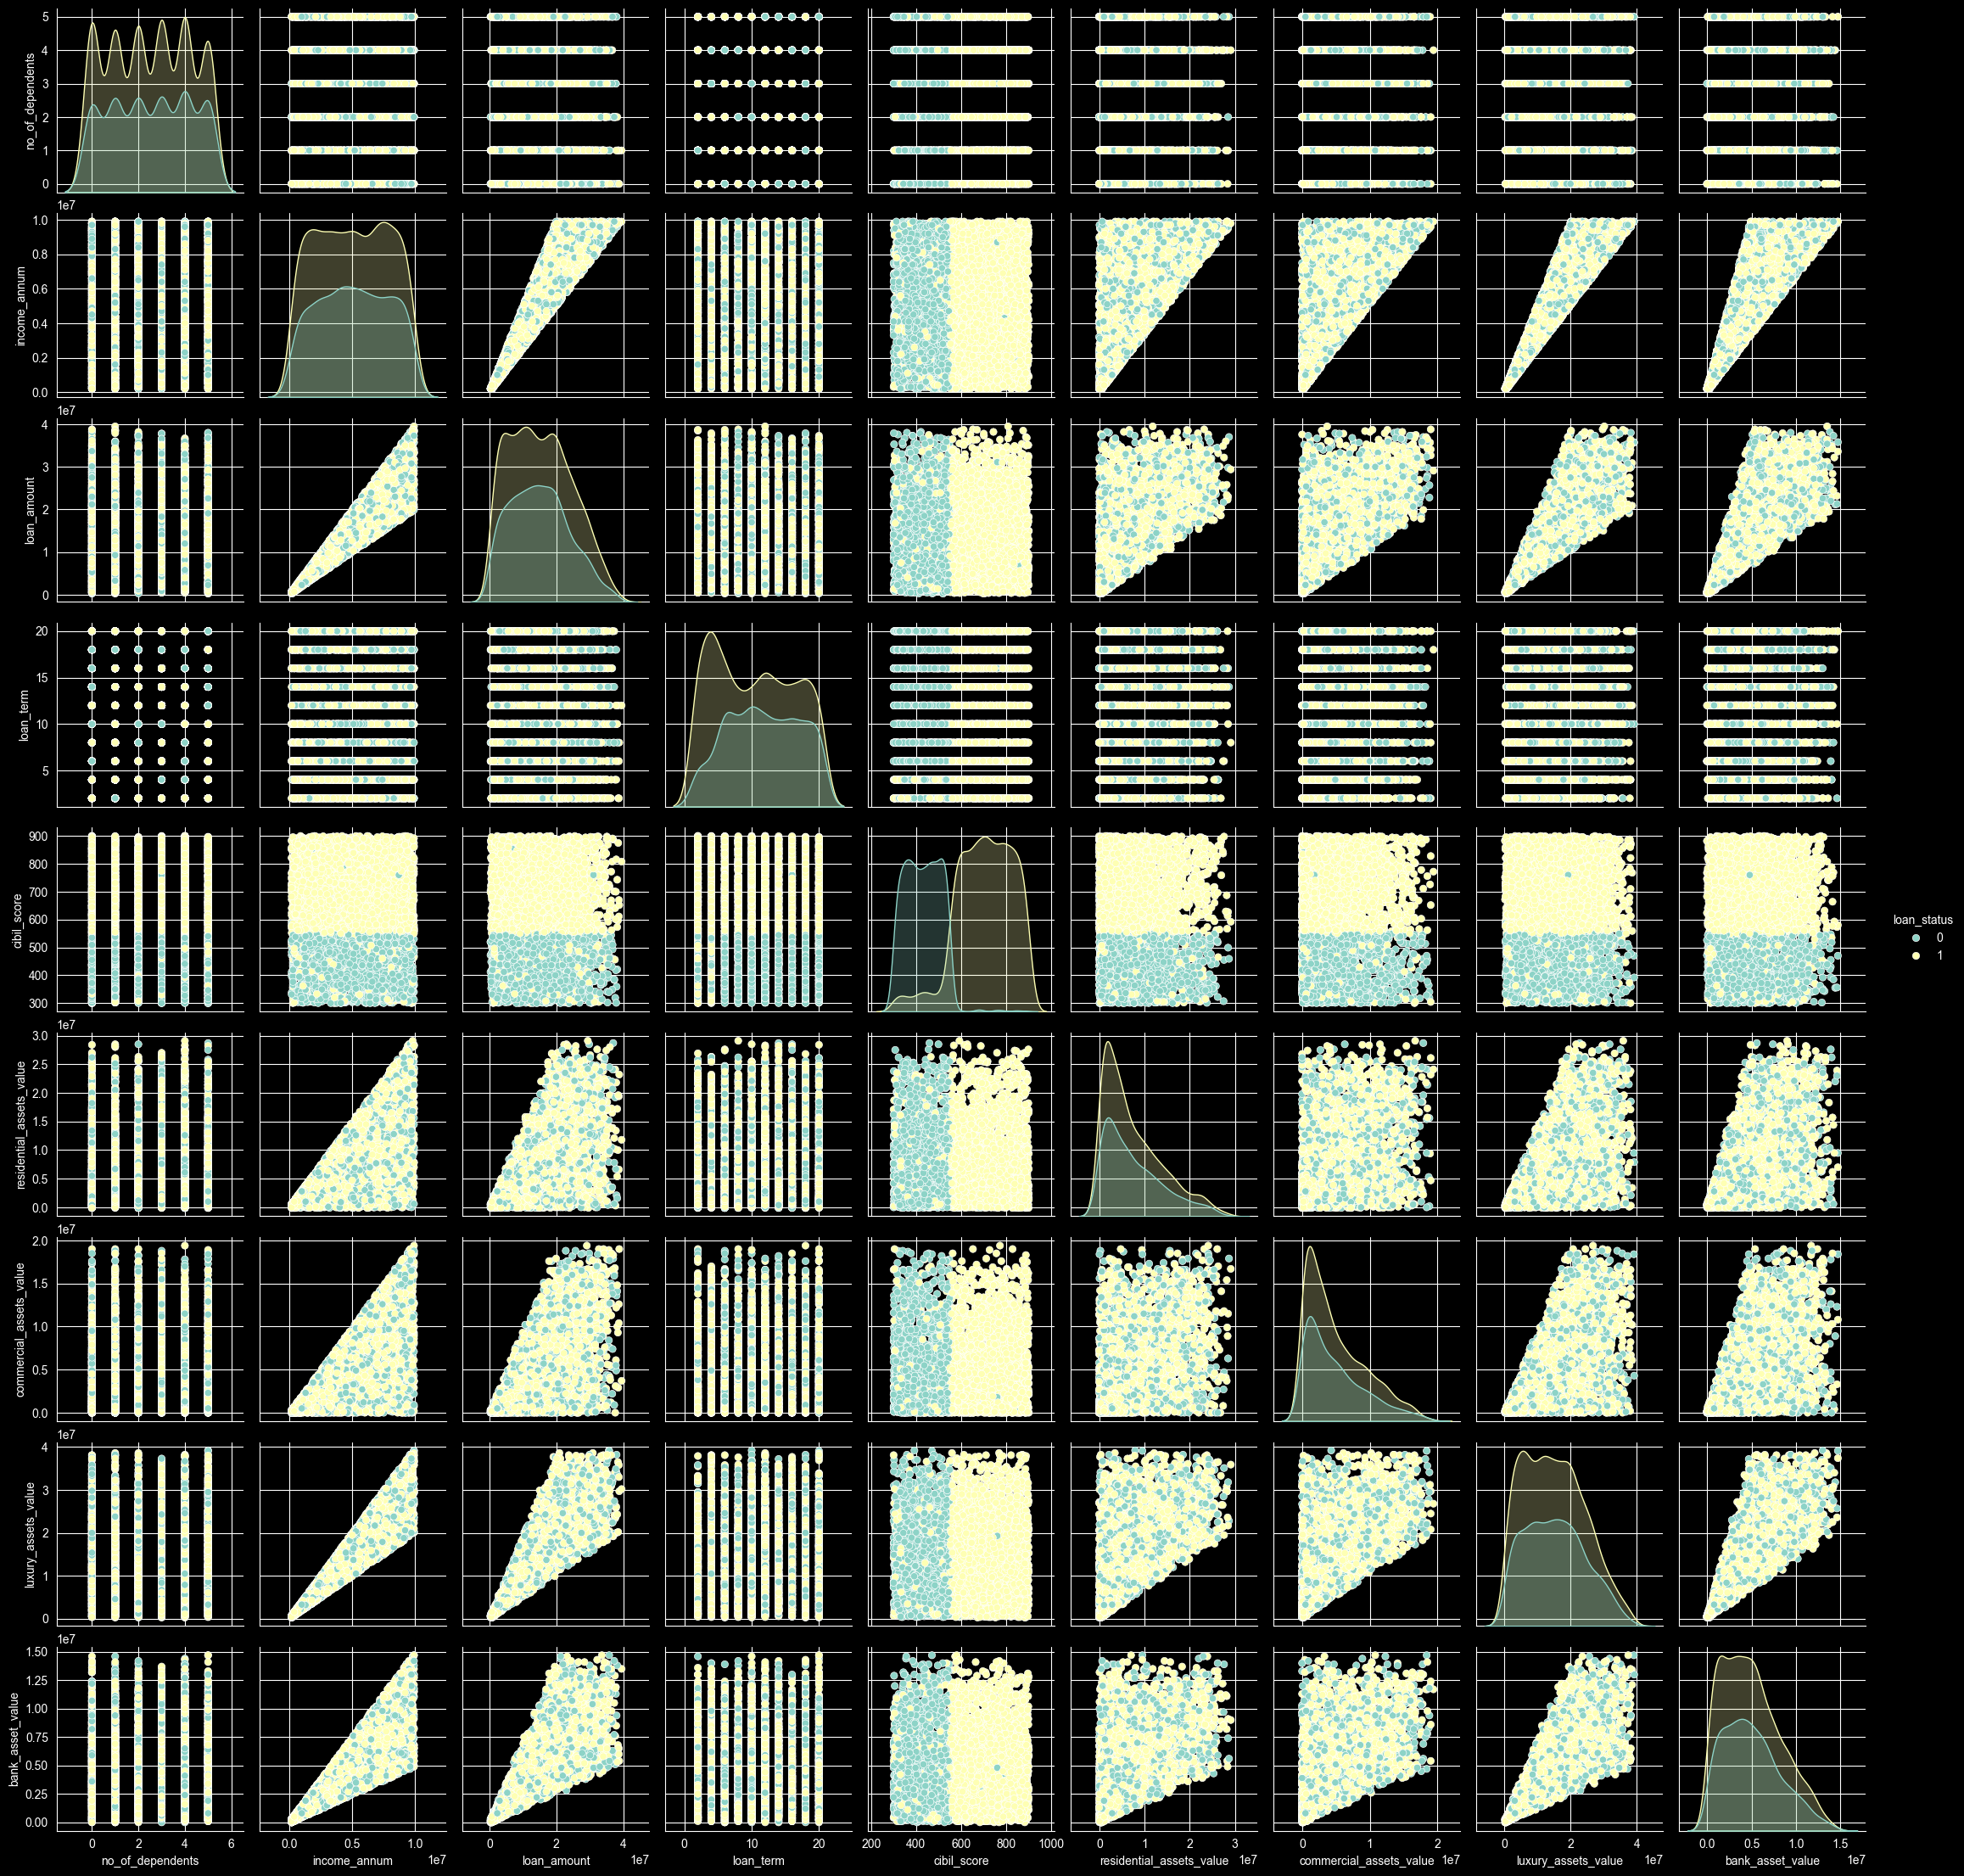

In [36]:
sb.pairplot(df[numerical_cols + ['loan_status']], hue = 'loan_status')
plt.show()

# Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df.drop('loan_status', axis = 1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape

((4269, 11), (3415, 11), (854, 11), (4269,), (3415,), (854,))

In [40]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
accuracy_score,
classification_report,
confusion_matrix,
roc_auc_score,
RocCurveDisplay
)


# Separate Feature Types

In [41]:
num_cols = X.select_dtypes(include=['int64']).columns
cat_cols = X.select_dtypes(include=['str']).columns

# Preprocessing Transformer

In [42]:
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

# Logistic Regression (Baseline)

In [43]:
log_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:,1]

In [44]:
print("Accuracy:", accuracy_score( y_test, y_pred))
print("ROC_AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


Accuracy: 0.9238875878220141
ROC_AUC: 0.9734305854366725
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       323
           1       0.96      0.92      0.94       531

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.93      0.92      0.92       854



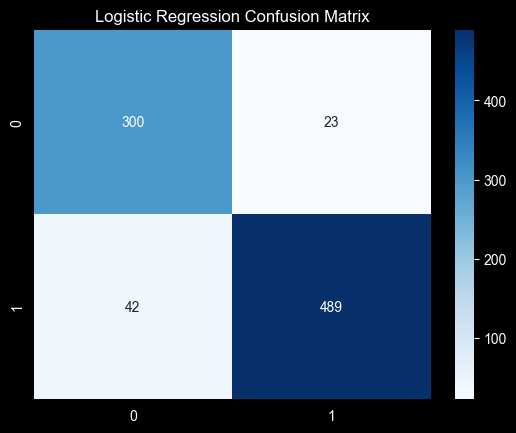

In [45]:
# Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_pred),
           annot = True, fmt = 'd', cmap = 'Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest (Stronger Model)

In [46]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators= 200,
        class_weight='balanced',
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

In [47]:
print("RF Accuracy:", accuracy_score(y_pred_rf, y_test))
print("RF ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

RF Accuracy: 0.9824355971896955
RF ROC-AUC: 0.9987814334773457


# Hyperparameter Tuning

In [48]:

params_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2,5]
}

grid  = GridSearchCV(
    rf_model,
    params_grid,
    cv = 5,
    scoring = 'roc_auc',
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}


In [49]:
best_model = grid.best_estimator_

# ROC Curve Comparison

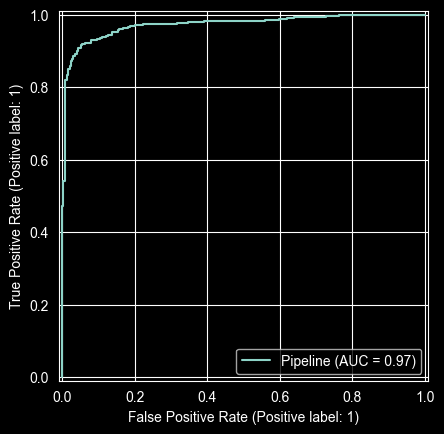

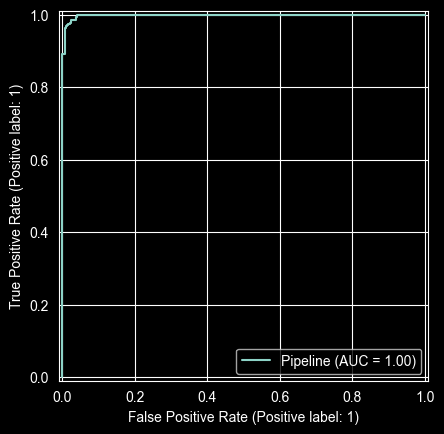

In [50]:
RocCurveDisplay.from_estimator(log_model, X_test, y_test)
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.show()

# Feature Importance

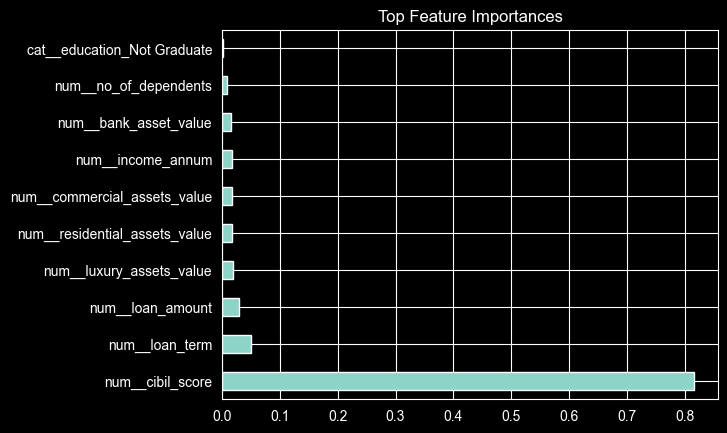

In [51]:
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

importances = best_model.named_steps['classifier'].feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

feat_imp.head(10).plot(kind = 'barh')
plt.title("Top Feature Importances")
plt.show()